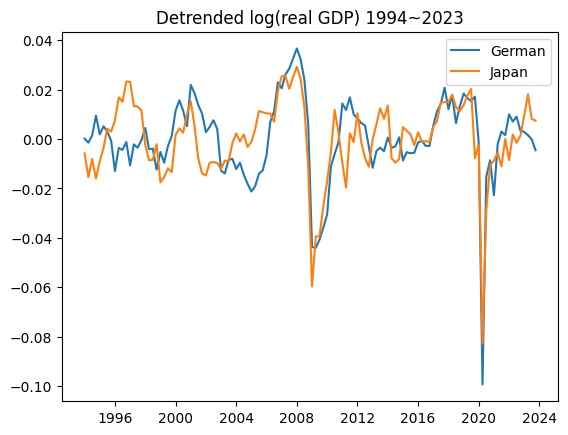

German standard deviation: 0.01703800376326912
Japan standard deviation: 0.016067442069596816
Correlation: 0.7072595963382003


In [25]:
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas_datareader as pdr
import numpy as np

start_date = '1994-01-01'
end_date = '2023-12-31'

gdp_deu = web.DataReader('CLVMNACSCAB1GQDE', 'fred', start_date, end_date)
log_gdp_deu = np.log(gdp_deu)
cycle_deu, trend_deu = sm.tsa.filters.hpfilter(log_gdp_deu ,lamb=1600)

gdp_jpn = web.DataReader('JPNRGDPEXP', 'fred', start_date, end_date)
log_gdp_jpn = np.log(gdp_jpn)
cycle_jpn, trend_jpn = sm.tsa.filters.hpfilter(log_gdp_jpn, lamb=1600)

cycle_deu_std = cycle_deu.std()
cycle_jpn_std = cycle_jpn.std()
cor = cycle_deu.corr(cycle_jpn)

plt.plot(cycle_deu, label="German")
plt.plot(cycle_jpn, label="Japan")
plt.legend()
plt.title("Detrended log(real GDP) 1994~2023")
plt.show()

print("German standard deviation:", cycle_deu_std)
print("Japan standard deviation:", cycle_jpn_std)
print("Correlation:", cor)